# About log_data_to_sequence

This notebook creates minable sequences from log data given a predetermined translation of log actions to sequence actions.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport utils_timeline_viz
%aimport utils_read_parsing
from utils_timeline_viz import *
from utils_read_parsing import *
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 25, 15
from matplotlib.backends.backend_pdf import PdfPages
import os
import numpy as np
import pandas as pd
import getpass
import datetime
import json
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None);pd.set_option('display.max_rows', None);pd.set_option('precision', 2)
# FOLDER =  'C:\\Users\\'+getpass.getuser()+'\\Documents\\Personal Content\\Lab_skills_study\\parsed log data'

# Preparing the data
We get all log files per student. They are stored in a dictionary like this:
```python
    log_files_per_sim = {'beers': {student1: [log_file_1.txt,log_file_2.txt], ...
                         'capacitor': {student1: [log_file_1.txt,log_file_2.txt], ...}
```

In [2]:
%aimport utils_read_parsing
log_files_per_sim = {}
for sim in ['beers','capacitor']:
    log_files_per_sim[sim] = get_parsed_log_files_per_student_for_sim(sim)

The file Sarah_beers_log_files_per_student.txt has been unpickled and loaded
The file Sarah_capacitor_log_files_per_student.txt has been unpickled and loaded


# Demo with one student
We are going to create the sequence for 1 student whose timeline visualization we have already visualized.

In [3]:
demo_student = 90447168
files = log_files_per_sim['beers'][demo_student]
df = prep_parsing_data(files[0]) #removes model events, adds pauses with arbitrary threshold of 9s
df.head()

D:\Applications\Anaconda2\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,User,Sim,Time,Index,User or Model,Component,Event,Item,Action,Laser toggle,Wavelength,Width,Concentration,Absorbance,Detector location,Ruler location,diff in parsed table,Table,X axis,Y axis,X axis scale,Y axis scale,Notes,Timeshifted,Duration,Family
0,90447168,beers-law-lab,3.06,572,user,sim,toggle laser,laser button,NaN,0.0,780.0,1.00,100.0,NaN,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.54,2.48,Vl
1,90447168,beers-law-lab,5.54,1131,user,sim,dragStarted,cuvetteNode,NaN,1.0,780.0,1.00,100.0,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.59,0.05,Vc
2,90447168,beers-law-lab,5.59,1136,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.00,100.0,0.96,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.66,0.07,Vc
3,90447168,beers-law-lab,5.66,1145,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.01,100.0,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.68,0.02,Vc
4,90447168,beers-law-lab,5.68,1148,user,sim,dragged,cuvetteNode,increasing,1.0,780.0,1.01,100.0,0.97,"{u'y': 2, u'x': 6.3}","{u'y': 3.58, u'x': 3.3}",NaN,{},NaN,NaN,NaN,NaN,NaN,5.72,0.03,Vc


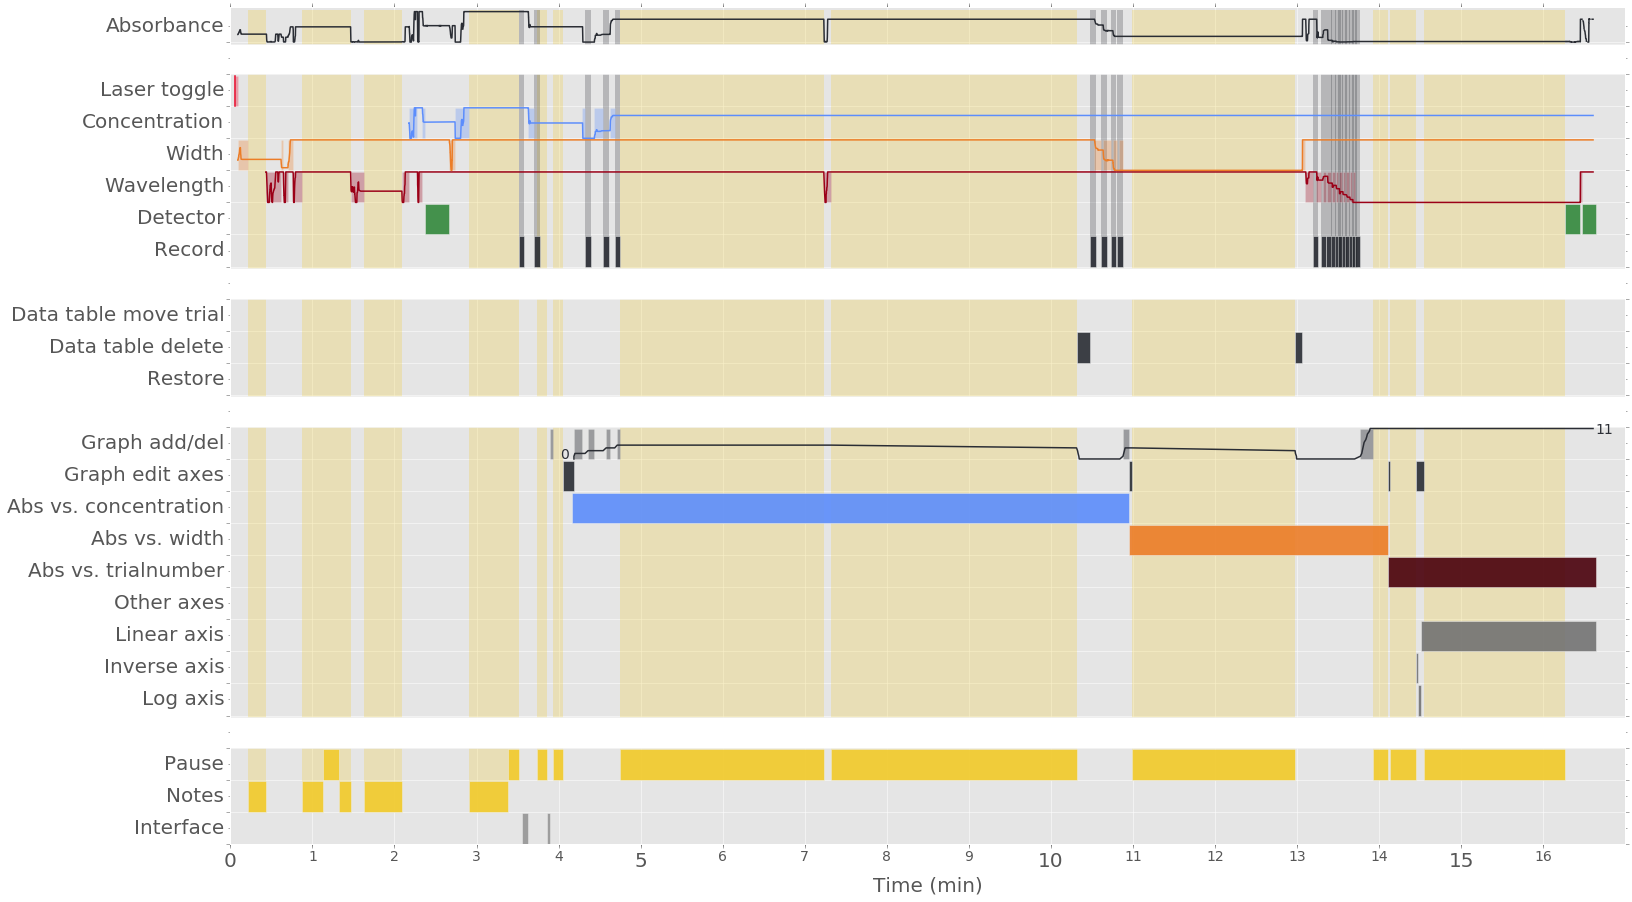

In [4]:
plot(df,to_plot_beers,family_name_to_code,function_to_use,colors)

## One by one, we convert them

In [5]:
rules = pd.read_csv('sequence_parsing_rules.txt', sep='\t')
rules.head()

,Sequence Action,User,Sim,Time,Index,User.1,Component,Event,Item,Action,Laser toggle,Wavelength,Width,Concentration,Absorbance,Detector location,Ruler location,diff in parsed table,Table,X axis,Y axis,X axis scale,Y axis scale,Notes
0,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,Changed concentration,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragged,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,change_concentration,NaN,NaN,NaN,NaN,NaN,NaN,dragStarted,solutionControls,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,change_other,NaN,NaN,NaN,NaN,NaN,NaN,dragEnded,detectorNode,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
rules_as_dict = [(rule['Sequence Action'],rule.drop('Sequence Action').dropna().to_dict()) for i,rule in rules.iterrows()]

In [7]:
def converter(row):
    action = ''
    for potential_action,rule in rules_as_dict:
        match=True
        for column,value in rule.iteritems():
            if row[column]!= value:
                match=False
                break
        if match:
#             if potential_action == 'table_add':
#                 return check_cvs_table(row)
#             if potential_action == 'graph_add':
#                 return check_cvs_graph(row)
            return potential_action
    return 'no_match_found'

In [8]:
#remove 'dragging' events, well still the drag_start and dragend
df = df[df['Event']!='dragged']
%time df['Sequence Action'] = df.apply(converter, axis=1)

Wall time: 219 ms


In [9]:
from itertools import groupby
sequence = [x[0] for x in groupby(df['Sequence Action'])]
sequence[0:10]

['laser_on',
 'change_width',
 'pause',
 'change_wavelength',
 'change_width',
 'change_wavelength',
 'change_width',
 'change_wavelength',
 'pause',
 'change_wavelength']

# Refine actions with cvs like quality

In [10]:
regex_pattern_trial = re.compile('trialNumber (\d+)')
def check_cvs_table(row):
    if row['Sequence Action']=='table_add':
        trial_number = int(regex_pattern_trial.match(row['Item']).group(1))
        table = json.loads(row['Table'])

        # if it's the first trial added or the table only has one trial, no possibility for doing cvs
        if trial_number == 1 or len(table)==1:
            return "table_add_first"
        else:
            #the last trial added in table (that still is in table and wasn't deleted) will have the greatest trial number
            last_trial_number = max([int(key) for key in table.keys() if int(key)!=trial_number])
            current_trial = table[str(trial_number)]
            last_trial = table[str(last_trial_number)]
    #         print trial_number, last_trial_number
            #we make sets of the all the values of variables between both trials
            values_of_2_points = get_values_per_variable([current_trial, last_trial])
    #         print values_of_2_points
            confounded = pts_are_confounded(values_of_2_points)
            outcomes = get_outcome_values([current_trial, last_trial])
            outcome1,outcome2 = outcomes[0],outcomes[1]
            #we check that only one variable is changed (confounded = False)
            # that the laser was not off, and that the connection wasn't to lightbulb
            # and that the outcome values are not null but floats
            if not confounded and 0 not in values_of_2_points["Laser toggle"] and "LIGHT_BULB_CONNECTED" not in values_of_2_points["Connection"] and isinstance(outcome1, float) and isinstance(outcome2, float):
                return "table_add_cvs"
            else:
                return "table_add_messy"
    else: return row['Sequence Action']

# row= df.iloc[2387]
# # row = df.iloc[2438]
# check_cvs_table(row)

In [11]:
%%time
df['Sequence Action table refined'] = df.apply(check_cvs_table, axis=1)

Wall time: 49 ms


# Parsing beers for all students

In [12]:
ids = get_students_to_analyze_log()
N = len(ids)

In [13]:
rules = pd.read_csv('sequence_parsing_rules.txt', sep='\t')

In [14]:
all_beers_logs = {}
for student in ids:
    filename = find_student_log_file('beers',student)
    df = prep_parsing_data(filename) #removes model events, adds pauses with arbitrary threshold of 9s
    df = df[df['Event']!='dragged'] #remove drag events, keep dragStart and dragEnded
    print student
    if df.empty:
        continue
    else:
        %time df['Sequence Action'] = df.apply(converter, axis=1)
        %time df['Sequence Action table refined'] = df.apply(check_cvs_table, axis=1)
        if df[df['Sequence Action']=='no_match_found'].empty:
            pass
        else:
            print df[df['Sequence Action']=='no_match_found']
        all_beers_logs[student] = list(df['Sequence Action table refined'])

11612162
Wall time: 80 ms
Wall time: 7 ms
13660166
Wall time: 151 ms
Wall time: 22 ms
41947147
Wall time: 392 ms
Wall time: 57 ms
64006159
Wall time: 133 ms
Wall time: 20 ms
15749160
Wall time: 321 ms
Wall time: 27 ms
16901162
Wall time: 111 ms
Wall time: 13 ms
51717164
Wall time: 346 ms
Wall time: 32 ms
10970160
Wall time: 311 ms
Wall time: 22 ms
17114169
Wall time: 105 ms
Wall time: 11 ms
17071167
Wall time: 108 ms
Wall time: 18 ms
17112137
Wall time: 194 ms
Wall time: 19 ms
19416160
Wall time: 148 ms
Wall time: 14 ms
11095146
Wall time: 153 ms
Wall time: 15 ms
11394167
Wall time: 397 ms
Wall time: 27 ms
89047164
Wall time: 84 ms
Wall time: 9 ms
13228164
Wall time: 68 ms
Wall time: 6 ms
11777163
Wall time: 120 ms
Wall time: 11 ms
13654167
Wall time: 96 ms
Wall time: 21 ms
86699164
Wall time: 359 ms
Wall time: 25 ms
15317162
Wall time: 117 ms
Wall time: 11 ms
14805169
Wall time: 177 ms
Wall time: 45 ms
10708152
Wall time: 178 ms
Wall time: 19 ms
15444164
Wall time: 84 ms
Wall time: 10

In [15]:
for k,v in all_beers_logs.iteritems():
#     print k,v
    if 'table_add_messy' in v:
        print k

23836160
64006159
19618321
19470169
85915167
16752165
15749160
16901162
51717164
10970160
17114169
17071167
19780165
22340167
12017165
19566168
19608154
17347163
19416160
16237162
15298166
11394167
53262971
11095146
19436162
13228164
19989152
18922151
15317162
14805169
14293162
10708152
15188167
10537160
12329163
17576140
17168593
14055131
17107166
26984162
12816168
12263156
55825144
16606167
16657165
17083161
17018157
15055169
15496161
13945160
19862157
12238164
10232160
12406161
13624169
19553138
17036164
24566161
36107164
17931169
14261165
19018165
13407169
10420167
11892169
19913165
83145167
16328144
13726167
11384795
16136159
46792161
13981167
14002169
10375163
18247165


In [16]:
all_beers_logs[15749160]

['laser_on',
 'change_wavelength',
 'change_wavelength',
 'change_wavelength',
 'change_wavelength',
 'change_width',
 'change_width',
 'change_wavelength',
 'change_wavelength',
 'ignore',
 'ignore',
 'change_width',
 'change_width',
 'pause',
 'ignore',
 'ignore',
 'change_concentration',
 'change_concentration',
 'change_concentration',
 'change_concentration',
 'table_add_first',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'table_add_cvs',
 'change_concentration',
 'change_concentration',
 'change_concentration',
 'change_con

In [17]:
# import pickle
# pickle_out = open(os.path.join(BIG_FOLDER,'all_massaged_data\\dict_by_student_beers_parsed_seqs.txt'),"wb")
# pickle.dump(all_beers_logs, pickle_out)
# pickle_out.close()

# Load pickled file

In [18]:
import pickle
pickle_in = open(os.path.join(BIG_FOLDER,'all_massaged_data\\dict_by_student_beers_parsed_seqs.txt'),"r")
all_beers_logs = pickle.load(pickle_in)
pickle_in.close()

# Descriptives

In [19]:
nb_use = {}
actions = ['graph_add','graph_axis','graph_remove','graph_scale','table_add']
for a in actions:
    nb_use[a] = []
    for student, seq in all_beers_logs.iteritems():
        nb_use[a].append(seq.count(a))

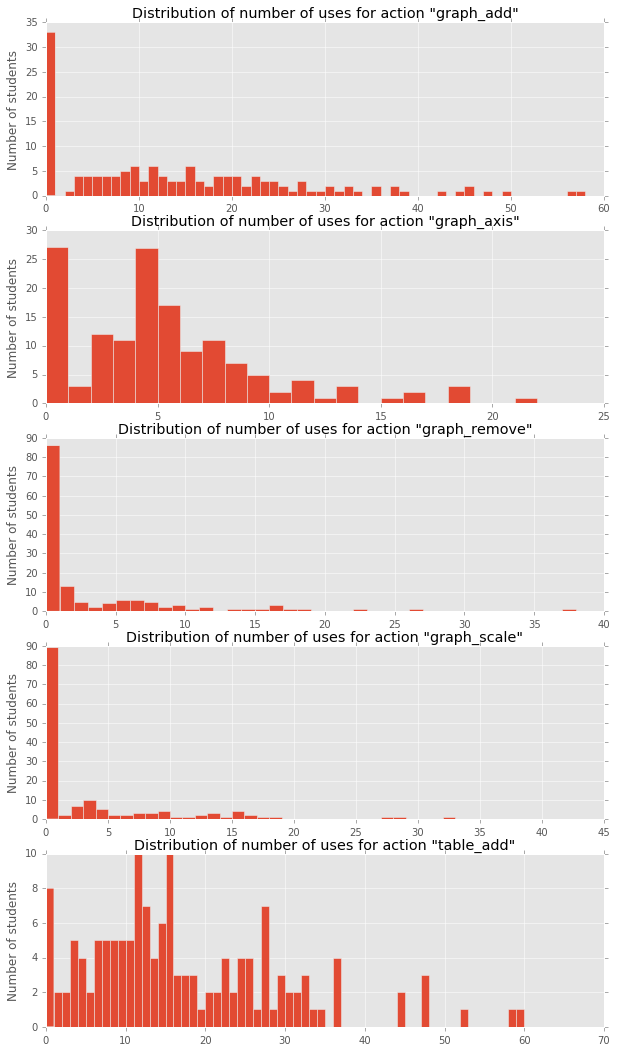

In [20]:
fig,axes = plt.subplots(nrows=len(actions),ncols=1,figsize=(10,18))
for i,a in enumerate(actions):
    ax=axes[i]
    ax.hist(nb_use[a],bins=range(max(nb_use[a])))
    ax.set(title='Distribution of number of uses for action "{0}"'.format(a))
    ax.set(ylabel='Number of students')

# to do

* remove 1 student from analysis that we remove in other analyses
* deal with multiple log files
* write rules for caps
* block the following actions: change_variable, pause
* turn graph_remove and table_remove into: graph/table_remove_one, graph/table_remove_multiple